**Volume-Weighted Average Price Formula**

VWAP is calculated by adding up the dollars traded for every transaction (price multiplied by the number of shares traded) and then dividing by the total shares traded.

**Calculation**

1. Find the average price the stock traded at over the first 5-minute period of the day. To do this, add the high, low, and close, then divide by three. Multiply this by the volume for that period. Record the result in a spreadsheet, under column PV.

2. Divide PV by the volume for that period. This will give the VWAP value.

3. To maintain the VWAP value throughout the day, continue to add the PV value from each period to the prior values. Divide this total by total volume up to that point. To make this easier in a spreadsheet, create columns for cumulative PV and cumulative volume. Both these cumulative values are divided by each other to produce VWAP.

**Etility**

Traders may use VWAP as a trend confirmation tool, and build trading rules around it.
 For example, when the price is above VWAP, they may prefer to initiate long positions. When the price is below VWAP they may prefer to initiate short positions.

In [71]:
import numpy as np
import pandas as pd
import talib as ta
import yfinance as yf
import matplotlib.pyplot as plt

In [72]:
# input
symbol = 'AAPL'
start = '2018-12-01'
end = '2019-02-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,46.115002,46.235001,45.302502,46.205002,44.854767,163210000
2018-12-04,45.237499,45.597500,44.067501,44.172501,42.881668,165377200
2018-12-06,42.939999,43.695000,42.605000,43.680000,42.403557,172393600
2018-12-07,43.372501,43.622501,42.075001,42.122501,40.891571,169126400
2018-12-10,41.250000,42.522499,40.832500,42.400002,41.160961,248104000


In [73]:
df['SMA'] = ta.SMA(df['Adj Close'], timeperiod=3)

In [74]:
df['VWMA'] = ((df['Adj Close']*df['Volume'])+(df['Adj Close'].shift(1)*df['Volume'].shift(1))+(df['Adj Close'].shift(2)*df['Volume'].shift(2))) / (df['Volume'].rolling(3).sum())
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,VWMA
Date,,,,,,,,
2018-12-03,46.115002,46.235001,45.302502,46.205002,44.854767,163210000,NaN,NaN
2018-12-04,45.237499,45.597500,44.067501,44.172501,42.881668,165377200,NaN,NaN
2018-12-06,42.939999,43.695000,42.605000,43.680000,42.403557,172393600,43.379997,43.359942
2018-12-07,43.372501,43.622501,42.075001,42.122501,40.891571,169126400,42.058932,42.055068
2018-12-10,41.250000,42.522499,40.832500,42.400002,41.160961,248104000,41.485363,41.446999


In [75]:
def VWMA(close,volume, n):
    cv =pd.Series(close.shift(n) * volume.shift(n))
    tv = volume.rolling(n).sum()
    vwma = cv/tv
    return vwma

VWMA(df['Adj Close'],df['Volume'], 3)

Date
2018-12-03          NaN
2018-12-04          NaN
2018-12-06          NaN
2018-12-07    14.442271
2018-12-10    12.027411
2018-12-11    12.055768
2018-12-12    11.929184
2018-12-13    22.237560
2018-12-14    17.878863
2018-12-17    12.508724
2018-12-18    11.136865
2018-12-19    12.853799
2018-12-20    11.933329
2018-12-21     6.508516
2018-12-24     9.687821
2018-12-26    12.874265
2018-12-27    23.527184
2018-12-28     8.601264
2018-12-31    17.134823
2019-01-02    17.605905
2019-01-03     9.816183
2019-01-04     7.167482
2019-01-07     6.935098
2019-01-08    20.407111
2019-01-09    14.966355
2019-01-10    16.132389
2019-01-11    13.910258
2019-01-14    17.618322
2019-01-15    15.147040
2019-01-16    10.889420
2019-01-17    13.253620
2019-01-18    11.329574
2019-01-22    12.233276
2019-01-23    12.924882
2019-01-24    16.266988
2019-01-25    13.772298
2019-01-28    10.145177
2019-01-29     9.306117
2019-01-30     9.961967
2019-01-31     6.926741
dtype: float64

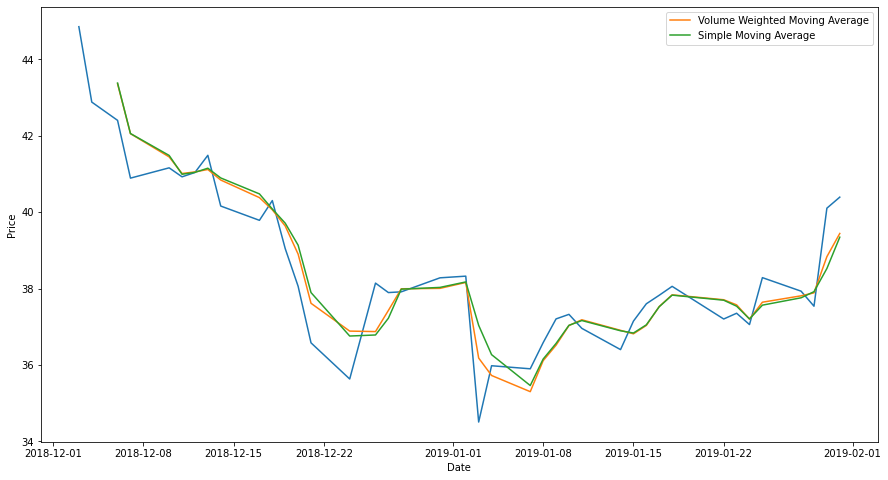

In [76]:
plt.figure(figsize=(15,8))
plt.plot(df['Adj Close'])
plt.plot(df['VWMA'], label='Volume Weighted Moving Average')
plt.plot(df['SMA'], label='Simple Moving Average')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()